In [1]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x_train = train_df.drop('label',axis=1)
y_train = train_df['label']

We cant pass values directly we need to reshape the dataframe

Tensor flow wont accept pandas it only accepts numpy so we need to convert all the values into the numpy array with shape(42000,28,28,1)

In [27]:
sample_im = x_train.values.reshape((42000,28,28))[69]

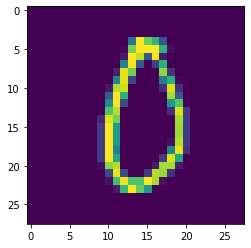

In [29]:
plt.imshow(sample_im);

As you can see above image is 0

In [30]:
x_train = x_train.values.reshape((42000,28,28,1))

In [31]:
x_train.shape

(42000, 28, 28, 1)

We converted all the image to the shape we can feed to model

In [39]:
y_train.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

As we can y_train is still the same.If we feed the y_train to the model it thinks these values as continous model.So we also need to reshape them to make model to understood that label is categorical

In [36]:
from tensorflow.keras.utils import to_categorical

In [40]:
y_train = to_categorical(y_train,num_classes=10)

In [41]:
y_train.shape

(42000, 10)

In [43]:
y_train[69]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

All data cleaning is complete now model development

In [44]:
from tensorflow.keras.models import Sequential

We are importing Sequential model

In [45]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten

Main parameters for Con2d layers are filters,kernel_size,strides,padding

1) filters : 32 or 64(generally with 2 powers) <br> 
2) kernel_size : the size of the kernel matrix (good start is (4,4)) <br>
3) strides : how big stepsize are we taking when moving kernel(if image size is big we can increase stride) <br>
4) padding : padding mean adding extra white line along boarders to capture data in the corners <br>

In [49]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120,activation='relu'))

# output layer softmax activation function --> cause its as mutliclass
# if it is a binary classification such as cat vs dog the activation should be sigmoid
model.add(Dense(10,activation='softmax'))

# we need to compile this for backpropogation
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

hyperparameters based on data

1) input_shape <br>
2) flatten layer should compulasary be present<br>
3) last dense layer should be no of categories

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop  = EarlyStopping(monitor='val_loss',patience=1)

In [53]:
model.fit(x_train,y_train,epochs=10,callbacks=[early_stop])

Epoch 1/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.5268 - accuracy: 0.9291
Epoch 2/10
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0766 - accuracy: 0.9776
Epoch 3/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 4/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0449 - accuracy: 0.9861
Epoch 5/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0357 - accuracy: 0.9893
Epoch 6/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0329 - accuracy: 0.9906
Epoch 7/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0316 - accuracy: 0.9909
Epoch 8/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0252 - accuracy: 0.9934
Epoch 9/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0275 - accuracy: 0.9923
Epoch 10/10
1313/1313 [==============================] - 27s 21m

In [54]:
metrics = pd.DataFrame(model.history.history)

In [55]:
metrics

,loss,accuracy
0,0.526783,0.929143
1,0.076593,0.977571
2,0.053757,0.983429
3,0.044873,0.986071
4,0.035723,0.989262
5,0.032890,0.990619
6,0.031569,0.990929
7,0.025250,0.993405
8,0.027492,0.992286
9,0.018543,0.994952


In [60]:
test_df = pd.read_csv('test.csv')

In [61]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x_test = test_df.values.reshape((28000,28,28,1))

In [66]:
predictions = model.predict(x_test)

875/875 [==============================] - 6s 7ms/step


In [67]:
predictions = np.argmax(predictions, axis=1)

In [68]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [69]:
pred_df = pd.DataFrame(data=predictions)

In [72]:
pred_df = pred_df.reset_index()

In [73]:
pred_df.columns = ['ImageId','Label']

In [77]:
pred_df['ImageId'] = pred_df['ImageId'].apply(lambda x:x+1)

In [79]:
pred_df.to_csv('sample_pred.csv',index=False)

In [81]:
model.save('rank_734_model.h5')